# Data understanding

In [942]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings

In [943]:
df = pd.read_csv("LUBS5990M_courseworkData_202223.csv")

In [944]:
df.head()

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,01-10-2019,01-10-2019,31.0,1,1,Ethereum,5.099990e+05,0,0.49
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,07-09-2018,12-10-2018,20.0,1,1,XAYA,2.250000e+08,1,0.41
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,01-07-2019,30-06-2020,10.0,1,1,Stellar,5.000000e+09,1,0.40
3,4,Y,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,01-10-2019,15-12-2019,27.0,1,1,Separate blockchain,1.250000e+08,1,0.13
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28-07-2019,30-11-2019,14.0,1,1,Ethereum,5.000000e+09,1,0.50


## Dataset Overview 

In [945]:
df.shape

(2767, 16)

In [946]:
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Variables: ", numerical_vars)

categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables: ", categorical_vars)

Numerical Variables:  ['ID', 'hasVideo', 'rating', 'priceUSD', 'teamSize', 'hasGithub', 'hasReddit', 'coinNum', 'minInvestment', 'distributedPercentage']
Categorical Variables:  ['success', 'brandSlogan', 'countryRegion', 'startDate', 'endDate', 'platform']


In [947]:
for col in numerical_vars:
    unique_count = df[col].nunique()
    print(f"Unique value count for column '{col}': {unique_count}")

Unique value count for column 'ID': 2767
Unique value count for column 'hasVideo': 2
Unique value count for column 'rating': 39
Unique value count for column 'priceUSD': 274
Unique value count for column 'teamSize': 53
Unique value count for column 'hasGithub': 2
Unique value count for column 'hasReddit': 2
Unique value count for column 'coinNum': 855
Unique value count for column 'minInvestment': 2
Unique value count for column 'distributedPercentage': 111


In [948]:
original_numerical_values = ['rating', 'priceUSD', 'teamSize', 'coinNum', 'distributedPercentage']

In [949]:
for col in categorical_vars:
    unique_count = df[col].nunique()
    print(f"Unique value count for column '{col}': {unique_count}")

Unique value count for column 'success': 2
Unique value count for column 'brandSlogan': 2763
Unique value count for column 'countryRegion': 120
Unique value count for column 'startDate': 760
Unique value count for column 'endDate': 776
Unique value count for column 'platform': 130


## Data Quality

In [950]:
missing_perc = df.isna().mean() * 100
columns_with_missing = missing_perc[missing_perc > 0]
table = pd.DataFrame(columns=["Column Name", "Missing Percentage"])
table["Column Name"] = columns_with_missing.index
table["Missing Percentage"] = columns_with_missing.values.round(2)
print(table)

     Column Name  Missing Percentage
0       priceUSD                6.51
1  countryRegion                2.57
2       teamSize                5.57


In [951]:
num_missing = df.isnull().any(axis=1).sum()
pct_missing = (num_missing / len(df)) * 100
print("Percentage of records with missing values:", pct_missing.round(2))

Percentage of records with missing values: 13.55


In [952]:
percentage = (df[df['priceUSD'] == 0]['priceUSD'].count() / len(df)) * 100
print(f"Percentage of priceUSD values that are 0 : {percentage:.2f}%")

Percentage of priceUSD values that are 0 : 5.49%


In [953]:
duplicate_percentage = (len(df[df.duplicated()]) / len(df)) * 100
print(f"Percentage of duplicates: {duplicate_percentage}%")

Percentage of duplicates: 0.0%


In [954]:
for col in categorical_vars:
    empty_count = df[df[col] == ' '].shape[0]
    total_count = df.shape[0]
    percentage = np.round(np.divide(empty_count, total_count) * 100.0, 2)
    print(f"Percentage of empty strings in column {col}: {percentage}%")

Percentage of empty strings in column success: 0.0%
Percentage of empty strings in column brandSlogan: 0.0%
Percentage of empty strings in column countryRegion: 0.0%
Percentage of empty strings in column startDate: 0.0%
Percentage of empty strings in column endDate: 0.0%
Percentage of empty strings in column platform: 0.22%


In [955]:
unique_chars = df['countryRegion'].unique()
print((sorted([char for char in unique_chars if pd.notnull(char)])))

['Afghanistan', 'Andorra', 'Anguilla', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Curacao', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guinea-Bissau', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malaysia', 'Malta', 'Marshall Islands', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'México', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nigeria', 'Northern Mariana Islands', 'Norway

In [956]:
unique_chars = df['platform'].unique()
print((sorted([char for char in unique_chars if pd.notnull(char)])))

[' ', ' Ethereum', ' NEO', 'AION', 'Acclaim', 'Achain', 'Akroma', 'Apollo Blockchain', 'Ardor', 'BEP2', 'BTC', 'BitForex', 'BitShares', 'Bitcoin', 'Bitshares', 'Bitsmo', 'Blockchain', 'ChainRepublik Blockchain', 'Coffe', 'Coincart', 'Counterparty', 'CryptoKami', 'CryptoNight', 'CryptoNote-based Blockchain', 'DAG', 'DECOIN Blockchain', 'DPOS', 'DPoS', 'ENLTE PLATFORM', 'ENTRY', 'EOS', 'ERC20', 'ETH', 'Eos', 'Ethererum', 'Ethereum', 'Ethereum ', 'Ethereum  ', 'Ethereum   ', 'Ethereum    ', 'Ethereum     ', 'Ethereum, Waves', 'Etherum', 'Fiber', 'Filecoin network', 'GoChain', 'Graphene', 'Hard-Fork of Litecoin', 'Hybrid', 'Hyperledger', 'ICON', 'IOV Blockchain', 'ISL-Blockchain', 'Infinity Blockchain', 'IronGeekChain', 'JPMorganChase', 'Keccak', 'Komodo', 'Lisk', 'Litecoin', 'MAHRA platform ', 'Monero', 'MultiChain', 'Multichain', 'NEM', 'NEO', 'NXT', 'Native', 'Neblio ', 'Nem', 'Neo', 'Neurochain', 'New Blockchain', 'Newton', 'Nilechain', 'POS', 'POS + POW', 'POS,POW', 'PivX', 'Pivx', 'P

## Statistical Summaries 

In [957]:
summary = df[original_numerical_values].describe()
summary

,rating,priceUSD,teamSize,coinNum,distributedPercentage
count,2767.000000,2587.000000,2613.000000,2.767000e+03,2767.000000
mean,3.121323,19.014036,13.107539,8.177888e+12,1.061370
std,0.714452,775.287126,8.082433,4.300022e+14,17.485513
min,1.000000,0.000000,1.000000,1.200000e+01,0.000000
25%,2.600000,0.040000,7.000000,5.000000e+07,0.400000
50%,3.100000,0.120000,12.000000,1.800000e+08,0.550000
75%,3.700000,0.500000,17.000000,6.000000e+08,0.700000
max,4.800000,39384.000000,75.000000,2.261910e+16,869.750000


## Data Visualisation 

In [958]:
def plot_histogram_boxplot(df, col):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    ax1.hist(df[col], bins=10, edgecolor='black', alpha=0.7)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram')

    sns.boxplot(df[col])
    ax2.set_title('Box plot')
    ax2.set_xlabel(col)

    # plt.suptitle('Box Plots and Histogram of '+ col +' variable', fontsize=14)
    plt.tight_layout()

    plt.savefig(col + '.png', format='png')
    plt.show()

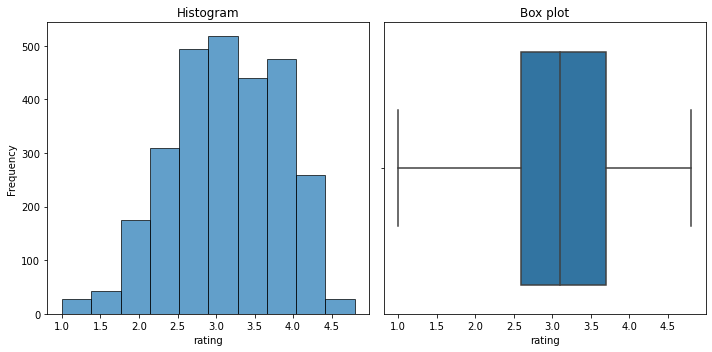

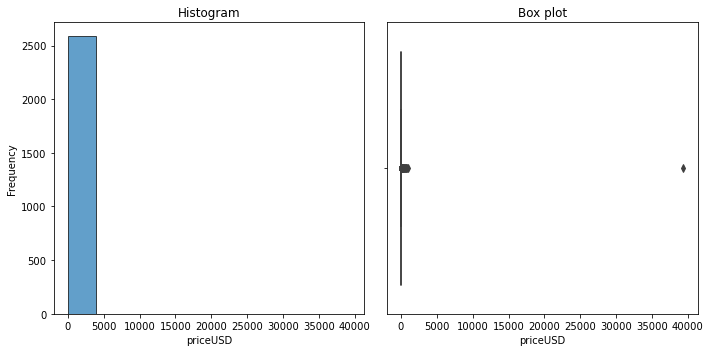

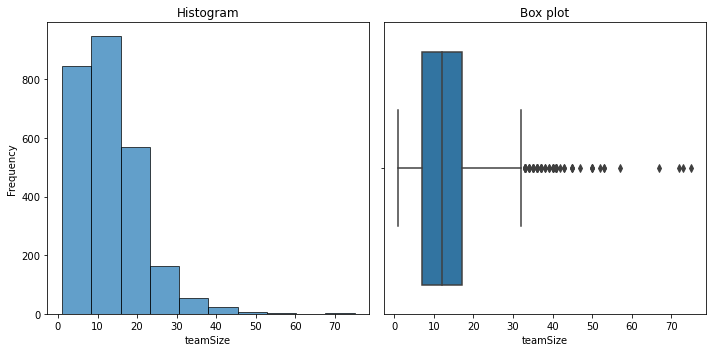

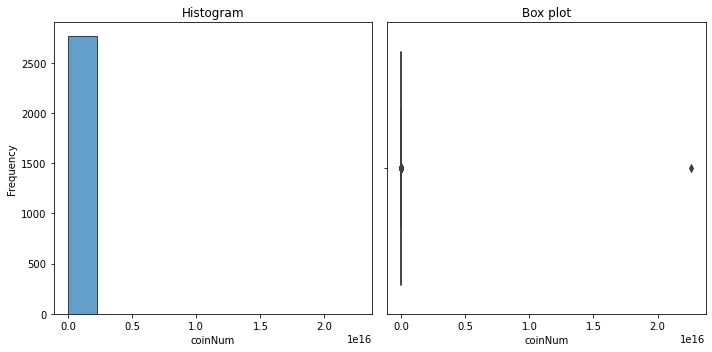

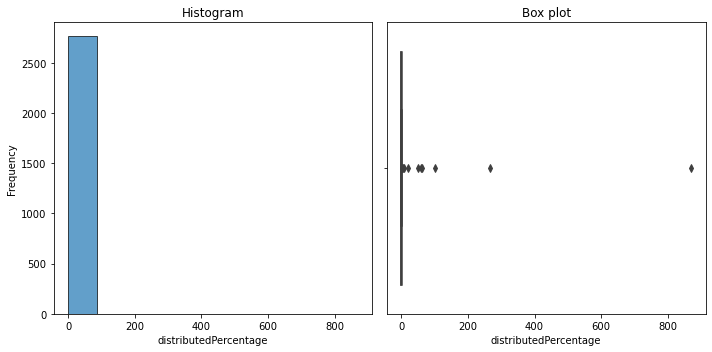

In [959]:
for i, col in enumerate(original_numerical_values):
    plot_histogram_boxplot(df, col)

In [960]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound))
outliers_percentage = (outliers.sum() / len(df)) * 100
columns_with_outliers = outliers_percentage[outliers_percentage > 0]

print("\nColumns with Outliers:")
table = pd.DataFrame(columns=["Column Name", "Outliers Percentage"])
table["Column Name"] = columns_with_outliers.index
table["Outliers Percentage"] = columns_with_outliers.values.round(2)
print(table)


Columns with Outliers:
             Column Name  Outliers Percentage
0                coinNum                14.28
1  distributedPercentage                 0.36
2               priceUSD                 8.67
3               teamSize                 2.39


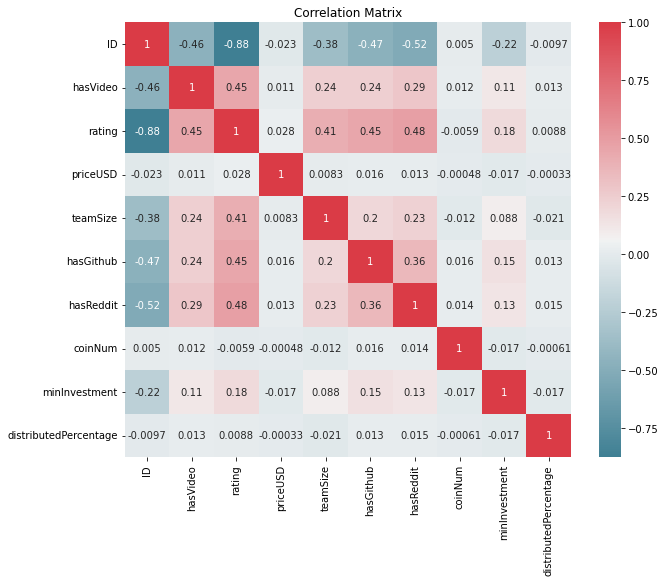

In [961]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, ax=ax)
ax.set_title('Correlation Matrix')
plt.savefig('correlation_matrix.png', format='png')
plt.show()

# Data Preparation

## Handling Missing Data

In [962]:
df['priceUSD'].fillna(df['priceUSD'].median(), inplace=True)
df['teamSize'].fillna(df['teamSize'].median(), inplace=True)
df['countryRegion'].fillna(df['countryRegion'].mode()[0], inplace=True)

In [963]:
df['priceUSD'] = np.where(df['priceUSD'] == 0, df['priceUSD'].median(), df['priceUSD'])

## Handling Outliers 

In [964]:
outlier_columns = ['priceUSD', 'teamSize', 'distributedPercentage', 'coinNum']

for column in outlier_columns:
    q1 = df[column].quantile(0.05)
    q3 = df[column].quantile(0.95)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [965]:
df.shape

(2614, 16)

## Feature Engineering

In [966]:
label_encoder = LabelEncoder()
df['success_encoded'] = label_encoder.fit_transform(df['success'])

In [967]:
value_counts = df['countryRegion'].str.lower().replace(['curacao', 'curaçao'], 'curacao').value_counts()
percentage = value_counts / len(df) * 100
total_percentage = percentage.head(10).sum()
print("Total percentage for top 10 unique values: %.2f%%" % total_percentage)

Total percentage for top 10 unique values: 60.64%


In [968]:
df['countryRegion'] = df['countryRegion'].str.lower().replace(['curacao', 'curaçao'], 'curacao')
top_10_countries = df['countryRegion'].value_counts().head(10).index.tolist()

filtered_df = df[df['countryRegion'].isin(top_10_countries)]
df = pd.concat([df, pd.get_dummies(filtered_df['countryRegion'])], axis=1)

countries_to_fill = ['cayman islands', 'estonia','germany', 'malta', 'netherlands', 'russia', 'singapore', 'switzerland','uk', 'usa',]
df[countries_to_fill] = df[countries_to_fill].fillna(0)

In [969]:
df['duration'] = np.abs((pd.to_datetime(df['endDate']) - pd.to_datetime(df['startDate'])).dt.days)

In [970]:
values_to_check = ['ETH', 'Ethererum', 'Ethereum', 'Ethereum, Waves', 'Etherum']
value_counts = df['platform'].str.strip().value_counts()
filtered_counts = value_counts[value_counts.index.isin(values_to_check)]
percentages = (filtered_counts / value_counts.sum()) * 100
print("Total percentage for Ethererum platform : %.2f%%" % percentages.sum())

Total percentage for Ethererum platform : 87.34%


In [971]:
values_to_check = ['ETH', 'Ethererum', 'Ethereum', 'Ethereum, Waves', 'Etherum']
df['platform_Ethereum'] = np.where(df['platform'].isin(values_to_check), 1, 0)

In [972]:
df['brandSlogan_score'] = df['brandSlogan'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

## Feature Selection 

In [973]:
X = df.drop(['success','success_encoded','brandSlogan','platform','startDate','endDate','ID','countryRegion'], axis=1)
y = df['success_encoded']

In [974]:
X.shape

(2614, 22)

In [975]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[feature_indices] if isinstance(X, pd.DataFrame) else None

print(selected_feature_names.values)

['hasVideo' 'rating' 'teamSize' 'hasGithub' 'hasReddit']


##  Test Train Split

In [976]:
platform_counts = df['success'].value_counts()
print("Frequency of success:")
print(platform_counts)

Frequency of success:
N    1631
Y     983
Name: success, dtype: int64


In [977]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

In [978]:
len(y_train)

2091

## Scaling

In [979]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [980]:
len(X_train)

2091

# Modelling

In [981]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


probas0 = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas0[:, 1])
roc_auc = auc(fpr, tpr)


metrics_df = pd.DataFrame({
    'Model': ['K-Nearest Neighbors'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1],
    'AUC' : [roc_auc],
})


In [982]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)


probas1 = naive_bayes.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas1[:, 1])

metrics_df.loc[1, 'Model'] = 'Naive Bayes'
metrics_df.loc[1, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[1, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[1, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[1, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[1, 'AUC'] = auc(fpr, tpr)

In [983]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

probas2 = svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas2[:, 1])

metrics_df.loc[2, 'Model'] = 'SVM'
metrics_df.loc[2, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[2, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[2, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[2, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[2, 'AUC'] = auc(fpr, tpr)

In [984]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

probas3 = random_forest.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas3[:, 1])

metrics_df.loc[3, 'Model'] = 'RandomForest'
metrics_df.loc[3, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[3, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[3, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[3, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[3, 'AUC'] = auc(fpr, tpr)


In [985]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

probas4 = svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas4[:, 1])

metrics_df.loc[4, 'Model'] = 'DecisionTree'
metrics_df.loc[4, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[4, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[4, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[4, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[4, 'AUC'] = auc(fpr, tpr)


In [986]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

probas5 = xgb_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas5[:, 1])

metrics_df.loc[5, 'Model'] = 'XGB'
metrics_df.loc[5, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[5, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[5, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[5, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[5, 'AUC'] = auc(fpr, tpr)

In [987]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

probas6 = ada_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas6[:, 1])

metrics_df.loc[6, 'Model'] = 'AdaBoost'
metrics_df.loc[6, 'Accuracy'] = accuracy_score(y_test, y_pred)
metrics_df.loc[6, 'Precision'] = precision_score(y_test, y_pred)
metrics_df.loc[6, 'Recall'] = recall_score(y_test, y_pred)
metrics_df.loc[6, 'F1-score'] = f1_score(y_test, y_pred)
metrics_df.loc[6, 'AUC'] = auc(fpr, tpr)

# Evaluation

In [988]:
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-score       AUC
0  K-Nearest Neighbors  0.652008   0.568807  0.314721  0.405229  0.653203
1          Naive Bayes  0.632887   0.512315  0.527919  0.520000  0.682476
2                  SVM  0.669216   0.666667  0.243655  0.356877  0.669685
3         RandomForest  0.638623   0.526316  0.406091  0.458453  0.608927
4         DecisionTree  0.613767   0.483444  0.370558  0.419540  0.669685
5                  XGB  0.623327   0.500000  0.375635  0.428986  0.617810
6             AdaBoost  0.686424   0.629921  0.406091  0.493827  0.679977


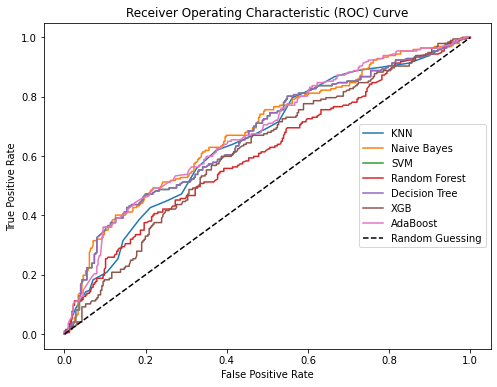

In [989]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = ['KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'Decision Tree', 'XGB', 'AdaBoost']
probas = [probas0, probas1, probas2, probas3, probas4, probas5, probas6]

plt.figure(figsize=(8, 6))

for i in range(len(models)):
    fpr, tpr, thresholds = roc_curve(y_test, probas[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=models[i])


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='center right')
plt.savefig('ROC.png', format='png')

plt.show()